# LINEER REGRESYON VARSAYIMLARI

## 1. Sıcaklık Tahmini

Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import levene


In [4]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

**1. Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.**

In [7]:
Y =weather_df['Temperature (C)']
X = weather_df[['Humidity','Wind Speed (km/h)', 'Wind Bearing (degrees)',  'Pressure (millibars)']]

In [8]:
deg_hesap = linear_model.LinearRegression()
deg_hesap.fit(X, Y)

LinearRegression()

In [9]:
print('Değişkenler: \n', deg_hesap.coef_)
print('Sabit değer (bias): \n', deg_hesap.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.92643818528533


**Temperature (C) = 37.92643818528533 - 3.24962454e+01 * Humidity - 2.01413742e-01 * Wind Speed + 4.04836936e-03 * Wind Bearing - 6.91759209e-04 * Pressure**

In [17]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
results = sm.OLS(Y, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:02:06   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2. Şimdi, modelinizin Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.**

**Varsayım 1:** Katsayılarda modelin doğrusallığı ==> Sağladı    

**Varsayım 2:** Hata terimi ortalamada sıfır olmalıdır ==> Sağladı

Hata neredeyse 0'dır.

In [36]:
tahmin=deg_hesap.predict(X)

hatalar=Y-tahmin

print("ortalama hata: {:.15f}".format(np.mean(hatalar)))

ortalama hata: 0.000000000000004


**Varsayım 3:** Homoscedasticity ==> Sağlamadı  
    
P değerleri 0.05' ten küçüktür.  Test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.    

In [23]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


**Varsayım 4:** Düşük çoklu doğrusallık/low multicollinearity ==> Sağladı

In [24]:
weather_df_corr=weather_df.corr()
weather_df_corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


Text(0.5, 1.0, 'Correlation Matrix (Szeged)')

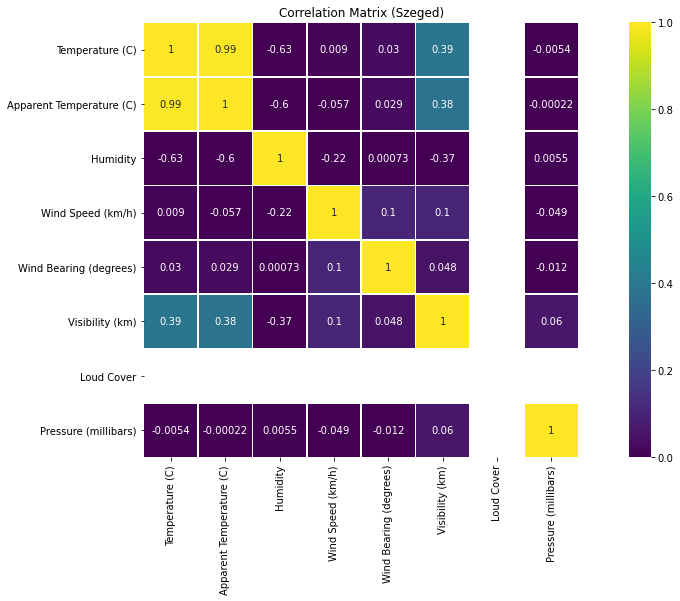

In [25]:
plt.figure(figsize=(18,8))


sns.heatmap(weather_df_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Szeged)")

In [ ]:
Sıcaklık; nem,  rüzgar hızı, rüzgar ve basınç ile  düşük korelasyona sahipir. 

**Varsayım 5**: Hata terimleri birbiriyle ilişkisiz olmalıdır  ==> 

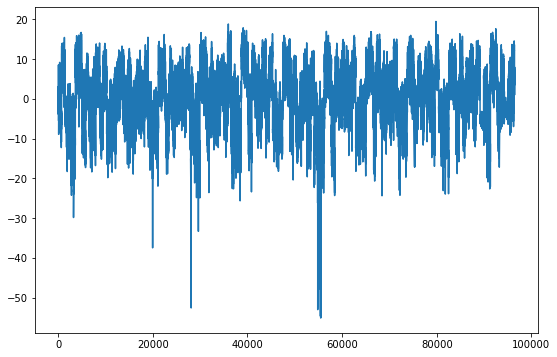

In [27]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


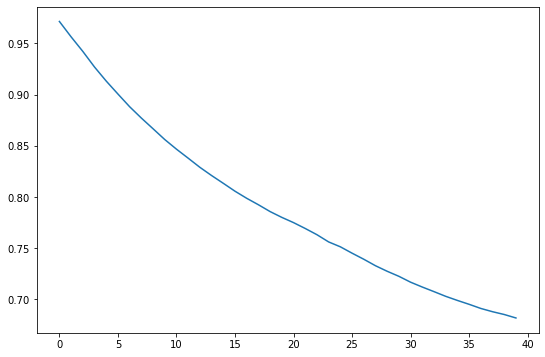

In [26]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

**Varsayım 6:** Özellikler hatalarla korele olmamalıdır  ==> 

## 2. Ev fiyatları

In [5]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**1. Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.**

In [14]:
Yhp = house_prices_df['SalePrice']
Xhp = house_prices_df[['OverallQual','YearBuilt', '1stFlrSF', 'GrLivArea']]

In [15]:
deg_hesap_hp = linear_model.LinearRegression()
deg_hesap_hp.fit(Xhp, Yhp)

LinearRegression()

In [16]:
print('Değişkenler: \n', deg_hesap_hp.coef_)
print('Sabit değer (bias): \n', deg_hesap_hp.intercept_)

Değişkenler: 
 [23810.52203049   449.90970865    35.53502386    50.02524533]
Sabit değer (bias): 
 -968324.616462354


**SalePrice = -968324.616462354 + 23810.52203049 * OverallQual + 449.90970865 * YearBuilt + 35.53502386 * 1stFlrSF + 50.02524533 * GrLivArea**

**2.Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.**

**Varsayım 1:** Katsayılarda modelin doğrusallığı ==> Sağladı



**Varsayım 2:** Hata terimi ortalamada sıfır olmalıdır ==> Sağladı

Hata neredeyse 0'dır.

In [17]:
tahmin_hp=deg_hesap_hp.predict(Xhp)

hatalar_hp=Yhp-tahmin_hp

print("ortalama hata: {:.15f}".format(np.mean(hatalar_hp)))

ortalama hata: 0.000000000133399


**Varsayım 3:** Homoscedasticity ==> Sağlamadı

P değerleri 0.05' ten küçüktür. Test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

In [18]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin_hp, hatalar_hp)
lev_stats = levene(tahmin_hp, hatalar_hp)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 445.664 ve p değeri : 0.000000000000000000000
Levene test değeri   : 478.893 ve p değeri : 0.000000000000000000000


**Varsayım 4:** Düşük çoklu doğrusallık/low multicollinearity ==> Sağladı

In [20]:
house_prices_df_corr=house_prices_df.corr().SalePrice
house_prices_df_corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

SalePrice; OverallQual','YearBuilt', '1stFlrSF', 'GrLivArea ile korelasyonu iyi sayılır.

In [29]:
house_prices_df_corr=house_prices_df.corr().OverallQual
house_prices_df_corr

Id              -0.028365
MSSubClass       0.032628
LotFrontage      0.251646
LotArea          0.105806
OverallQual      1.000000
OverallCond     -0.091932
YearBuilt        0.572323
YearRemodAdd     0.550684
MasVnrArea       0.411876
BsmtFinSF1       0.239666
BsmtFinSF2      -0.059119
BsmtUnfSF        0.308159
TotalBsmtSF      0.537808
1stFlrSF         0.476224
2ndFlrSF         0.295493
LowQualFinSF    -0.030429
GrLivArea        0.593007
BsmtFullBath     0.111098
BsmtHalfBath    -0.040150
FullBath         0.550600
HalfBath         0.273458
BedroomAbvGr     0.101676
KitchenAbvGr    -0.183882
TotRmsAbvGrd     0.427452
Fireplaces       0.396765
GarageYrBlt      0.547766
GarageCars       0.600671
GarageArea       0.562022
WoodDeckSF       0.238923
OpenPorchSF      0.308819
EnclosedPorch   -0.113937
3SsnPorch        0.030371
ScreenPorch      0.064886
PoolArea         0.065166
MiscVal         -0.031406
MoSold           0.070815
YrSold          -0.027347
SalePrice        0.790982
Name: Overal

Birbirleri ile korelasyonları çok yüksek sayılmaz, orta seviyelerdedir

**Varsayım 5:** Hata terimleri birbiriyle ilişkisiz olmalıdır ==>

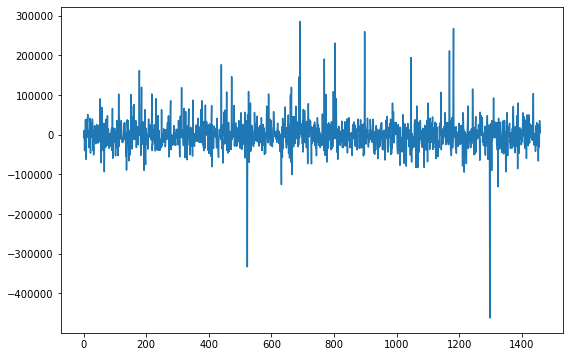

In [30]:
plt.figure(figsize=(9,6))
plt.plot(hatalar_hp)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


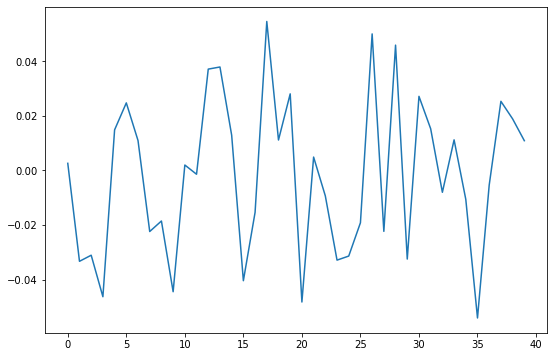

In [31]:
from statsmodels.tsa.stattools import acf

acf_data_hp = acf(hatalar_hp)

plt.figure(figsize=(9,6))
plt.plot(acf_data_hp[1:])
plt.show()

Modelimizin hataları arasındaki otokorelasyon gerçekten çok düşüktür (-0,04 ile 0,05 arasında).

**Varsayım 6:** Özellikler hatalarla korele olmamalıdır ==>